In [1]:
!pip install min-dalle

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.2 MB/s eta 0:00:00
  Created wheel for min-dalle: filename=min_dalle-0.4.11-py3-none-any.whl size=10520 sha256=b48419db3fd14221a42adc1c3afc763bad2bfea9ad02e2a5c2428e1c788895fc
  Stored in directory: /root/.cache/pip/wheels/52/6d/e3/c4eae4ec07f23168d03ed0f58073be84cd4d0a4c990eec7dc2
Successfully built min-dalle


In [2]:
from min_dalle import MinDalle
import torch

In [3]:
# Create a directory named "pretrained" if it doesn't already exist.
# The '-p' flag ensures that parent directories are also created if needed.

!mkdir -p "./pretrained"

In [4]:
# Check if a CUDA-compatible GPU is available.
# If available, set the 'device' variable to "cuda"; otherwise, set it to "cpu".
device = "cuda" if torch.cuda.is_available() else "cpu"

print(device)

cuda


In [5]:
# Load the model
model = MinDalle(
    models_root='./pretrained',
    dtype=torch.float16,
    device=device,
    is_mega=True,
    is_reusable=True
)

using device cuda
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


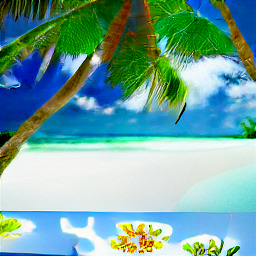

In [6]:
image = model.generate_image(
    text="Generate an image of a tropical beach with palm trees, white sand, and crystal-clear blue water.",
    seed=-1,
    grid_size=1,
    is_seamless=False,
    temperature=1,
    top_k=256,
    supercondition_factor=32,
    is_verbose=False
)

image.save('Output_2.png')

display(image)

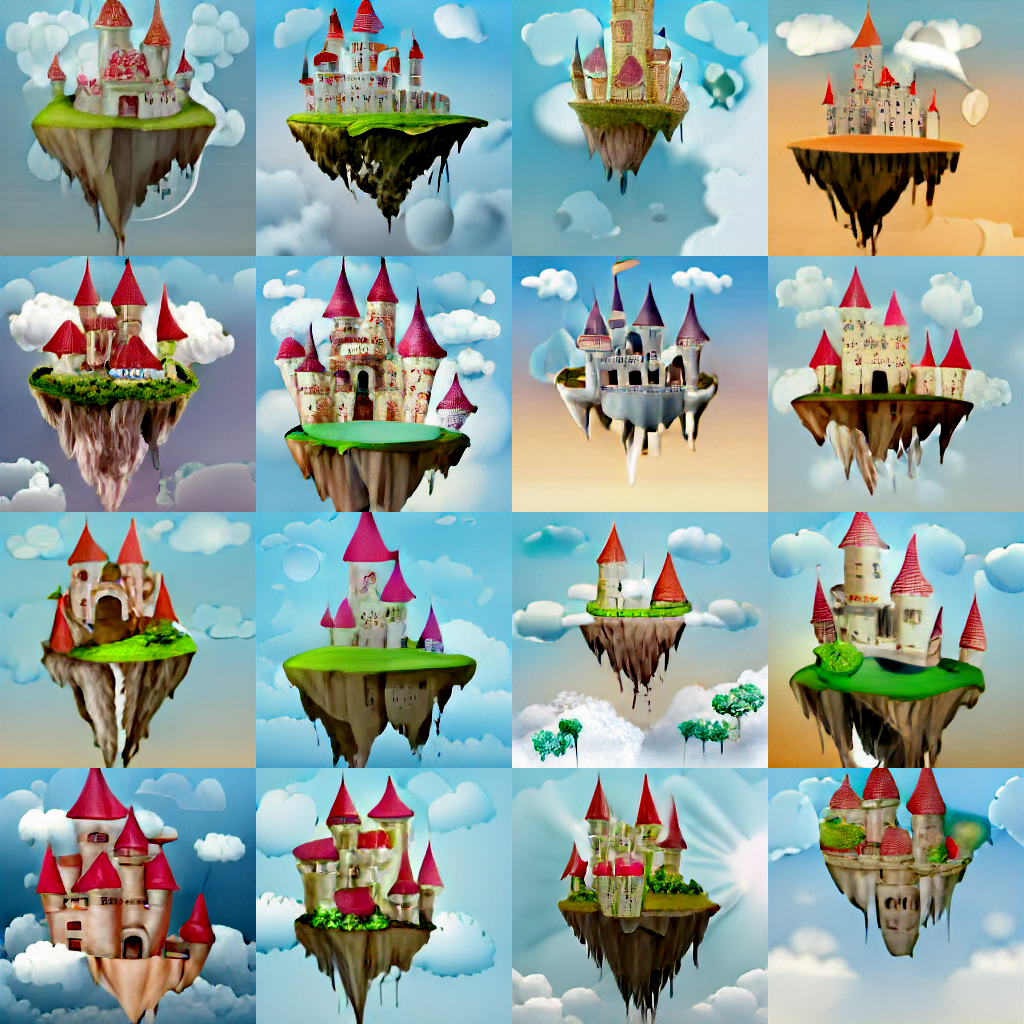

In [11]:
text = "Generate an illustration of a fairytale castle on top of a floating island in the sky."

image = model.generate_image(
    text=text,
    seed=-1,
    grid_size=4,
    is_seamless=False,
    temperature=1,
    top_k=256,
    supercondition_factor=32,
    is_verbose=False
)

image.save('Output_3.png')

display(image)


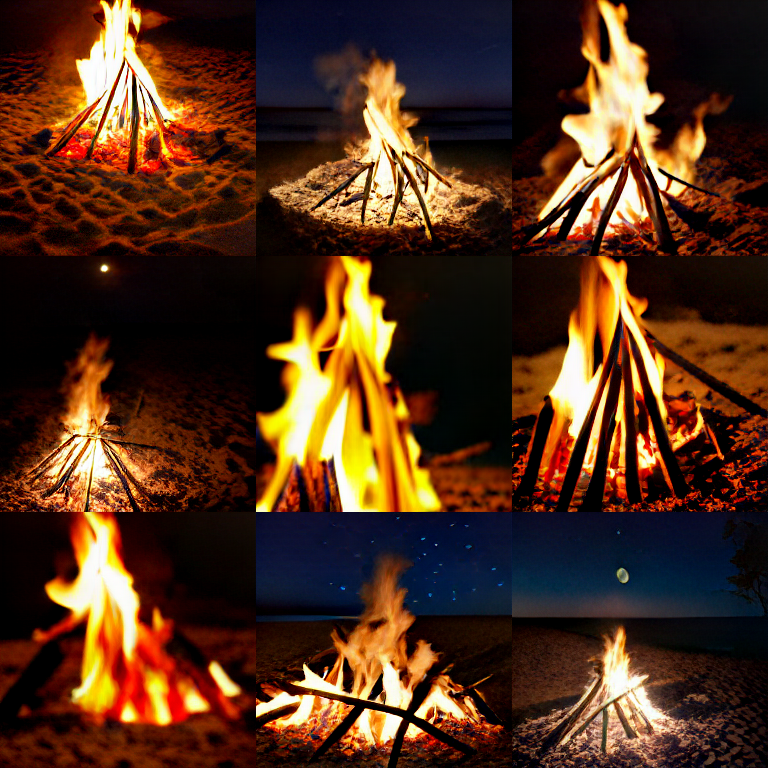

In [24]:
image = model.generate_image(
    text="Beachfront bonfire on a moonlit night",
    seed=-1,
    grid_size=3,
    is_seamless=False,
    temperature=1,
    top_k=256,
    supercondition_factor=32,
    is_verbose=False
)

image.save('Output.png')

display(image)

In [27]:
# Conect to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# Save the image
images_root = "/content/drive/MyDrive/Text to Image/"
image.save(images_root + 'Output.png')

In [29]:
# Clear GPU memory
torch.cuda.empty_cache()